# Time step usando código de Shor:

El primer experimento consiste en codificar un qubit en estado $\ket{0}_L$ dejar pasar un tiempo $T_0$ y medir. Vamos a implementar dos experimentos, uno donde antes de medir aplicamos corrección de errores y otro donde no.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import RXGate, UGate, IGate
from qiskit.circuit import QuantumCircuit, Delay
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2


import sys
import os

# Tenemos que agregar ".." a nuestro sys.path para usar SteaneCodeCircuit
sys.path.append(os.path.abspath(".."))
from objects.shor_code_circuit import ShorCodeCircuit

### Prueba de circuito con Delay en IBM:

Primero vamos a ver un ejemplo de cómo introducir un delay en IBM. Usamos la función $\textcolor{orange}{\text{Delay()}}$ de $\textcolor{green}{\text{qiskit.circuit}}$ para agregar un Delay de tiempo al circuito. La función Delay recibe el tiempo en $\textcolor{orange}{\text{dt}}$ (Unidad de tiempo natural del backend). Así Dado un **QuantumCircuit** podemos agregar el Delay usando $\textcolor{orange}{\text{.append()}}$.

En esta prueba corremos un circuito con $\textcolor{orange}{\text{Delay} = 1000 \hspace{3pt} \text{dt}}$ y calculamos el error rate:

$$\text{Error-rate} = \frac{\text{Cantidad de} \hspace{3pt} \ket{1} \hspace{3pt} \text{medidos}}{\text{shots}}$$

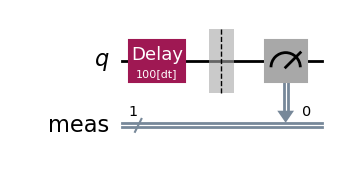

In [2]:
# Podemos crear un QuantumCircuit y simplemente agregar .id() a la compuerta:
qc = QuantumCircuit(1)
qc.append(Delay(100), [0]) # dt [Backend dependent time unit]
qc.measure_all()

qc.draw("mpl")

In [4]:
# Instanciamos el servicio
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)

In [5]:
# Podemos ver los backends disponibles (que no sean simuladores) a los que tenemos acceso
print("Available Back-ends for this job:")
service.backends()
service.backends(simulator=False, operational=True, min_num_qubits=23)
backend = service.backend("ibm_brisbane")

Available Back-ends for this job:


In [6]:
# Una vez elegido el backend podemos ver el dt (unidad de tiempo natural) del backend elegido
dt = backend.configuration().dt
dt

5e-10

In [7]:
sampler = SamplerV2(backend)
shots = 124

# Transpilar el circuito
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = transpile(qc, backend, scheduling_method="asap", optimization_level=1)

isa_circuit.draw() # Imprimimos el circuito transpilado

┌────────────────┐ ░ ┌──────────────┐┌─┐
          q_0 -> 0 ─┤ Delay(100[dt]) ├─░─┤ Delay(4[dt]) ├┤M├
                   ┌┴────────────────┤ ░ └──────────────┘└╥┘
    ancilla_0 -> 1 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
    ancilla_1 -> 2 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
    ancilla_2 -> 3 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
    ancilla_3 -> 4 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
    ancilla_4 -> 5 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
    ancilla_5 -> 6 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
    ancilla_6 -> 7 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
    ancilla_7 -> 8 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
    ancilla_8 -> 9 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
   ancilla_9 -> 10 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_10 -> 11 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_11 -> 12 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_12 -> 13 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_13 -> 14 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_14 -> 15 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_15 -> 16 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_16 -> 17 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_17 -> 18 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_18 -> 19 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_19 -> 20 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_20 -> 21 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_21 -> 22 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_22 -> 23 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_23 -> 24 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_24 -> 25 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_25 -> 26 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_26 -> 27 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_27 -> 28 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_28 -> 29 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_29 -> 30 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_30 -> 31 ┤ Delay(2704[dt]) ├────────────────────╫─
                   ├─────────────────┤                    ║ 
  ancilla_31 -> 32 ┤ Delay(2704[dt]) ├─────────────────

In [ ]:
# Correr el circuito en el backend y obtener resultados
job = sampler.run([isa_circuit], shots = shots)
pub_result = job.result()

# Obtenemos las medidas
result = pub_result[0]
meas = result['__value__']['data']['meas'].get_counts()
print(f" > Resultados obtenidos: {meas}")

# Calculamos la tasa de error
error_rate = 1 - meas['0']/shots
print(f" > Error rate: {error_rate}")

In [ ]:
# Calculamos la tasa de error
error_rate = 1 - meas['0']/shots
print(f" > Error rate: {error_rate}")

### Experimento 1: circuito con delay sin corrección de errores

Usamos la clase $\textcolor{orange}{\text{SteaneCodeCircuit()}}$ para crear un circuito lógico con el código de Steane. Este experimento consiste en codificar un qubit lógico $\ket{0}_L$ aplicar un Delay $t$ en los 7 qubits del código y medir. Por lo tanto el experimento sigue la siguiente estructura:

$$\text{Encode} \rightarrow \text{Delay}(t) \rightarrow \text{Measure}$$

El resultado esperado de la medición es $\ket{0}$ (Si no hay error), por lo que podemos calcular el Error-rate para este experimento.

In [8]:
dt = [1, 10, 100, 500, 1000]
circuits = []

for t in dt:
    # Generamos el circuitio sin corrección de errores:
    qc_shor = ShorCodeCircuit(logical_qubit_count=1)
    qc_shor.encode()
    for i in range(qc_shor.physical_qubit_count):
        qc_shor.append_unitary_error(Delay(t), i) # Podemos agregar el delay cómo append unitary error

    qc_shor.measure_all()

    # Extraemos el QuantumCircuit físico y lo transpilamos
    qc = qc_shor.physical_quantum_circuit
    isa_circuit = transpile(qc, backend, scheduling_method="asap", optimization_level=1)
    circuits.append(isa_circuit)

In [9]:
print(f" > Profundidad del circuito original: {qc.depth()}")
print(f" > Profundidad del circuito transpilado: {isa_circuit.depth()}")

 > Profundidad del circuito original: 16
 > Profundidad del circuito transpilado: 127


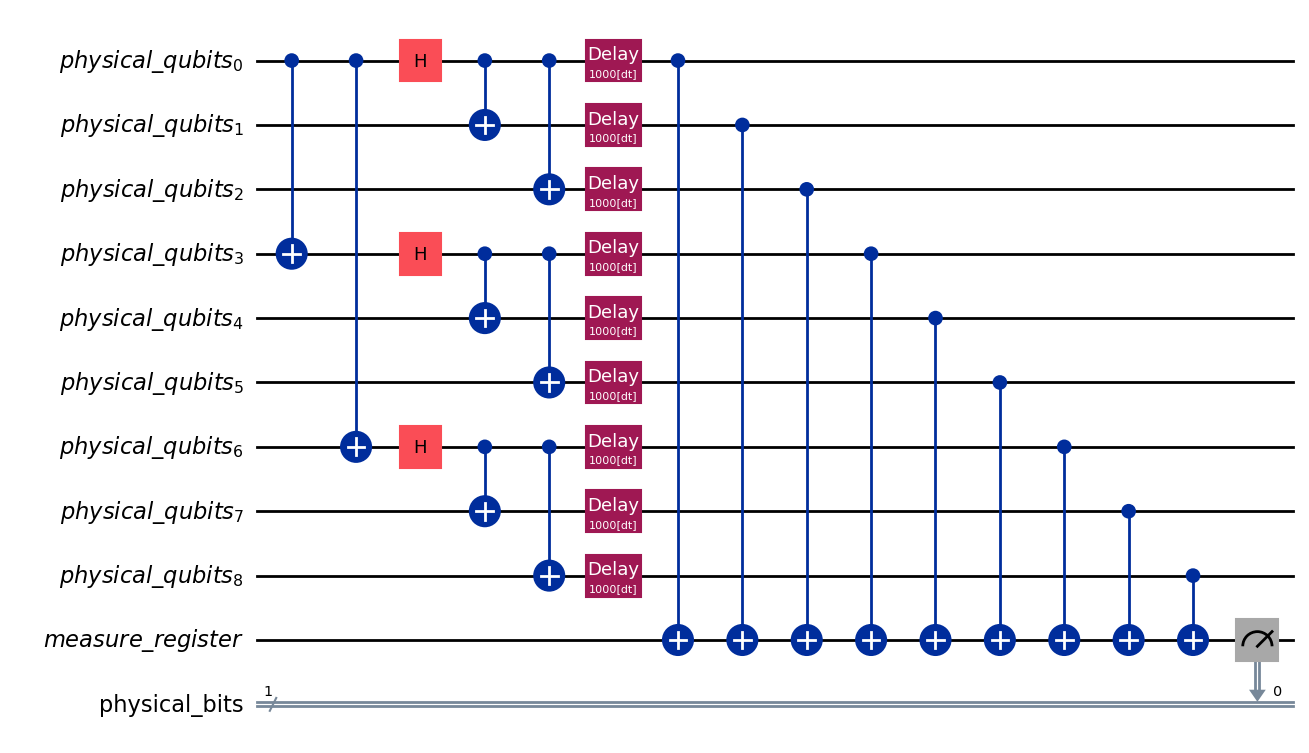

In [10]:
qc.draw('mpl')

In [11]:
sampler = SamplerV2(backend)
shots = 124

# Corremos el experimento
job = sampler.run(circuits, shots = shots)
pub_result = job.result()

KeyboardInterrupt: 

In [13]:
sampler = SamplerV2(backend)
shots = 100
# job = sampler.run(circuits, shots=shots)
# print(job.job_id())
job = service.job('cxjrkcdgcckg008sqj40')
pub_result = job.result()

In [15]:
print(pub_result)

PrimitiveResult([SamplerPubResult(data=DataBin(physical_bits=BitArray(<shape=(), num_shots=124, num_bits=1>)), metadata={'circuit_metadata': {}}), SamplerPubResult(data=DataBin(physical_bits=BitArray(<shape=(), num_shots=124, num_bits=1>)), metadata={'circuit_metadata': {}}), SamplerPubResult(data=DataBin(physical_bits=BitArray(<shape=(), num_shots=124, num_bits=1>)), metadata={'circuit_metadata': {}}), SamplerPubResult(data=DataBin(physical_bits=BitArray(<shape=(), num_shots=124, num_bits=1>)), metadata={'circuit_metadata': {}}), SamplerPubResult(data=DataBin(physical_bits=BitArray(<shape=(), num_shots=124, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-12-20 21:24:50', stop='2024-12-20 21:25:03', size=620>)])}, 'version': 2})


In [14]:
meas = pub_result[1]['__value__']['data']['physical_bits'].get_counts()
meas['0']

TypeError: 'SamplerPubResult' object is not subscriptable

In [ ]:
error_rates = np.zeros(len(dt))
measures = []

for i in range(len(dt)):
    result = pub_result[i]
    meas = result['__value__']['data']['physical_bits'].get_counts()
    error_rate = 1 - meas['0']/shots

    error_rates[i] = error_rate
    measures.append(meas)

In [ ]:
# Imprimimos las tasas de error
error_rates

In [ ]:
# Imprimimos las medidas:
for i in range(len(dt)):
    print(f"Resultado con t = {dt[i]}: {measures[i]}")